In [1]:
import tensorflow as tf

In [2]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',  "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='fonts',
    extract=True
)

In [3]:
import pathlib
font_csvs =  sorted(str(p) for p in pathlib.Path('fonts').glob("*.csv"))

font_csvs[:10]

['fonts/AGENCY.csv',
 'fonts/ARIAL.csv',
 'fonts/BAITI.csv',
 'fonts/BANKGOTHIC.csv',
 'fonts/BASKERVILLE.csv',
 'fonts/BAUHAUS.csv',
 'fonts/BELL.csv',
 'fonts/BERLIN.csv',
 'fonts/BERNARD.csv',
 'fonts/BITSTREAMVERA.csv']

In [4]:
len(font_csvs)

153

In [5]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = 'fonts/*.csv',
    batch_size=1, num_epochs=1,
    num_parallel_reads=20,
    shuffle_buffer_size=10000)

Metal device set to: Apple M1


2022-07-10 11:11:35.768560: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-10 11:11:35.768641: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
for features in fonts_ds.take(1):
    break
    for i, (name, value) in enumerate(features.items()):
        if i>15:
            break
    print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

2022-07-10 11:11:42.208082: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-10 11:11:52.279094: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6946 of 10000
2022-07-10 11:11:56.509896: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


...
[total: 412 features]


In [9]:
features

OrderedDict([('font',
              <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'TECHNIC'], dtype=object)>),
             ('fontVariant',
              <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'TECHNICLITE'], dtype=object)>),
             ('m_label',
              <tf.Tensor: shape=(1,), dtype=int32, numpy=array([61509], dtype=int32)>),
             ('strength',
              <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.4], dtype=float32)>),
             ('italic',
              <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>),
             ('orientation',
              <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>),
             ('m_top',
              <tf.Tensor: shape=(1,), dtype=int32, numpy=array([34], dtype=int32)>),
             ('m_left',
              <tf.Tensor: shape=(1,), dtype=int32, numpy=array([25], dtype=int32)>),
             ('originalH',
              <tf.Tensor: shape=(1,), dtype=int32, numpy

##### description
image = [None] * 400 은 값이 None으로 이루어진 len 400짜리 리스트 생성


In [8]:
import re

def make_images(features):
    image = [None]*400
    new_feats = {}

    for name, value in features.items():
        match = re.match('r(\d+)c(\d+)', name)
        if match:
            image[int(match.group(1))*20+int(match.group(2))] = value
        else:
            new_feats[name] = value

    image = tf.stack(image, axis=0)
    image = tf.reshape(image, [20, 20, -1])
    new_feats['image'] = image

    return new_feats

In [48]:
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
    break

2022-07-10 16:56:53.076275: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5025 of 10000
2022-07-10 16:57:03.040912: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 9228 of 10000
2022-07-10 16:57:04.942227: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


2022-07-10 16:57:29.298422: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at strided_slice_op.cc:108 : INVALID_ARGUMENT: slice index 1 of dimension 2 out of bounds.


InvalidArgumentError: slice index 1 of dimension 2 out of bounds. [Op:StridedSlice] name: strided_slice/

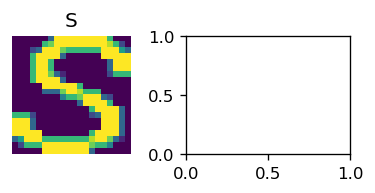

In [49]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=120)

for n in range(10):
    plt.subplot(4,3,n+1)
    plt.imshow(features['image'][..., n])
    plt.title(chr(features['m_label'][n]))
    plt.axis('off')

In [ ]:
for key, value in enumerate(features.items()):
    print(key)
    print(value)
    print('=============================')

In [40]:
a = re.match('(hello){3}', 'hellohellohelloworld')
a

<re.Match object; span=(0, 15), match='hellohellohello'>

In [47]:
a.group(0)

'hellohellohello'